## Imports

In [41]:
import cv2 as cv
import numpy as np
from tensorflow.keras.datasets import mnist
from math import log10 , copysign
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filter the dataset to include only the labels 0, 1, and 2
train_filter = np.isin(y_train, [0, 1, 2])
test_filter = np.isin(y_test, [0, 1, 2])

x_train = x_train[train_filter]
y_train = y_train[train_filter]
x_test = x_test[test_filter]
y_test = y_test[test_filter]

11490434/11490434 [==============================] - 0s 0us/step


## Preprocess

In [6]:
#Normalizing the pictures
x_train = cv.normalize(x_train, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)
x_test = cv.normalize(x_test, None, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

#Convert pictures to binary
_,x_train = cv.threshold(x_train, 128, 255, cv.THRESH_BINARY)
_,x_test = cv.threshold(x_test, 128, 255, cv.THRESH_BINARY)

## Calculate Hu Moments

In [37]:
#function for calculating moments and hu moments
def HuMoments(image):
  moments = cv.moments(image)
  humoments = cv.HuMoments(moments)
  for i in range(7):
    humoments[i] = -1* copysign(1.0, humoments[i]) * log10(max(1e-10 , abs(humoments[i])))
  return humoments.flatten()

#convert output to ndarray
train_humoments = np.array(list(map(HuMoments , x_train)))
test_humoments = np.array(list(map(HuMoments , x_test)))

<ipython-input-37-c0ca6b328282>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  humoments[i] = -1* copysign(1.0, humoments[i]) * log10(max(1e-10 , abs(humoments[i])))


## Create an svm model and train it

In [39]:
# Create the SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(train_humoments, y_train)

SVC(kernel='linear')

## Evaluate the Model

In [40]:
# Predict on the test set
y_pred = svm_model.predict(test_humoments)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.09%


## Show some example

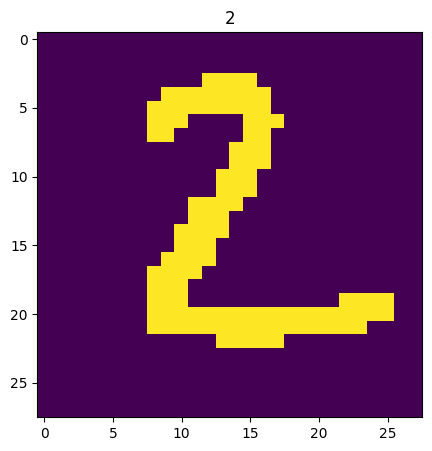

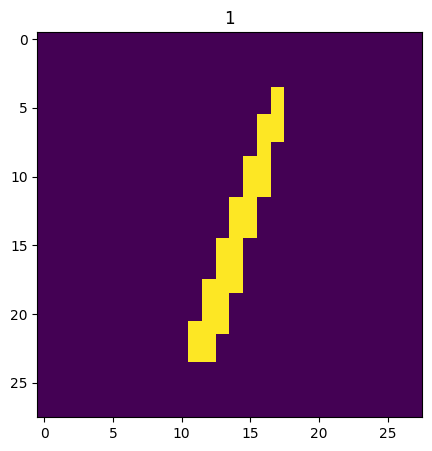

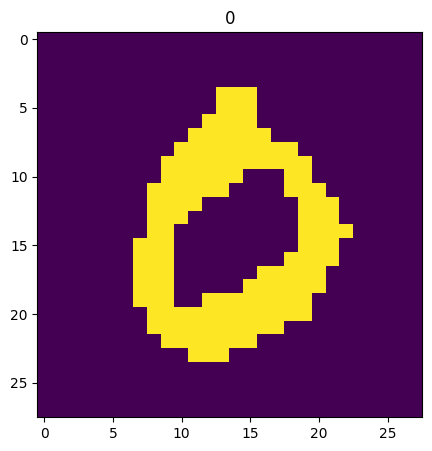

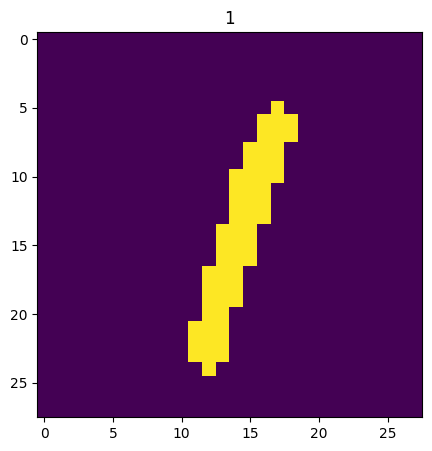

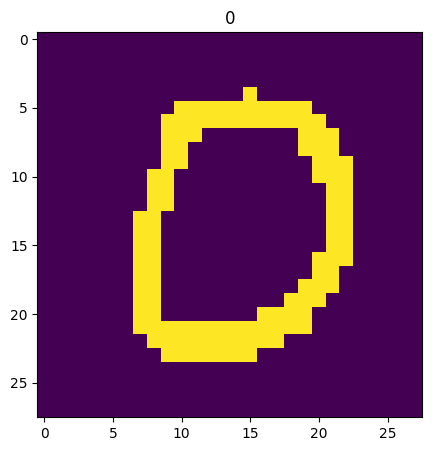

In [42]:
##show some of images with their labels
for image in range(5):
  plt.figure(figsize=(5, 5))
  plt.imshow(x_test[image])
  plt.title(y_pred[image])
  plt.show()